# Convert `nsc_qa` to `iapp_wiki_qa_squad` format

We use the `nsc_qa` version where the contexts are truncated to about 300 `newmm` words.

In [47]:
%matplotlib inline
import numpy as np
import pandas as pd
import json
from datasets import load_dataset, load_from_disk

In [48]:
# #convert to jsonl format
# with open('../data/train_fold_1.newmm-300.right-margin-ntokens-10.json') as f:
#     j = json.load(f)

# with open('../data/train_fold_1.newmm-300.right-margin-ntokens-10.jsonl', 'a') as f:
#     for i in j:
#         json.dump(i,f)
#         f.write('\n')
        
# with open('../data/validate_fold_1.newmm-300.right-margin-ntokens-10.json') as f:
#     j = json.load(f)

# with open('../data/validate_fold_1.newmm-300.right-margin-ntokens-10.jsonl', 'a') as f:
#     for i in j: 
#         json.dump(i,f)
#         f.write('\n')
        
# with open('../data/test_fold_1.edited.newmm-300.right-margin-ntokens-10.json') as f:
#     j = json.load(f)

# with open('../data/test_fold_1.edited.newmm-300.right-margin-ntokens-10.jsonl', 'a') as f:
#     for i in j: 
#         json.dump(i,f)
#         f.write('\n')

In [86]:
datasets = load_dataset('json', 
                       data_files={'train':'../data/train_fold_1.newmm-300.right-margin-ntokens-10.jsonl',
                                   'validation':'../data/validate_fold_1.newmm-300.right-margin-ntokens-10.jsonl',
                                   'test':'../data/test_fold_1.edited.newmm-300.right-margin-ntokens-10.jsonl',
                                  },)
datasets

W0712 22:18:58.516806 139784080262976 builder.py:357] Using custom data configuration default-086661ee710dfbfa
W0712 22:18:58.549046 139784080262976 builder.py:512] Reusing dataset json (/home/cstorm125/.cache/huggingface/datasets/json/default-086661ee710dfbfa/0.0.0/dc7ee63ec8b554c48ecc5a8a6fbe27af8071408c244e4347cf9222d6206d83a2)


DatasetDict({
    train: Dataset({
        features: ['dataset', 'question', 'question_id', 'doc_id', 'answers', 'passage', 'passage_ntokens_newmm', 'title'],
        num_rows: 9045
    })
    validation: Dataset({
        features: ['dataset', 'question', 'question_id', 'doc_id', 'answers', 'passage', 'passage_ntokens_newmm', 'title'],
        num_rows: 1005
    })
    test: Dataset({
        features: ['dataset', 'question', 'question_id', 'doc_id', 'answers', 'passage', 'passage_ntokens_newmm', 'title'],
        num_rows: 4950
    })
})

In [87]:
datasets['train'][0]

{'dataset': 'thwiki_qa15k_newmm-300',
 'question': 'เวียนนามถูกจีนปกครองนานนับพันปี ตั้งแต่ พ.ศ. 432 จนถึงปี พ.ศ. ใด',
 'question_id': 14947,
 'doc_id': 69950,
 'answers': {'answer_start': [527], 'answer_end': [531], 'text': ['1481']},
 'passage': 'จื๋อโนม จื๋อโนม () เป็นระบบอักษรที่ใช้เขียนภาษาเวียดนาม ปัจจุบันเลิกใช้แล้ว จื๋อโนมประกอบด้วยอักษรจีน ("ฮั่นจื้อ" เรียกเป็นภาษาเวียดนามว่า "ฮ้านตึ" - ) และอักขระที่ประดิษฐ์ขึ้นตามแบบอักษรจีน ตัวอย่างที่เก่าที่สุดอยู่ในช่วงคริสต์ศตวรรษที่ 13 มักนิยมใช้เฉพาะในหมู่ชนชั้นสูงของเวียดนาม โดยส่วนใหญ่ใช้บันทึกวรรณคดีเวียดนาม (งานเขียนที่เป็นทางการส่วนใหญ่จะใช้ภาษาจีนแบบแผน ไม่ใช่ภาษาเวียดนาม) ปัจจุบันถือว่าถูกแทนที่โดยสมบูรณ์ด้วยจื๋อโกว๊กหงือซึ่งดัดแปลงจากอักษรละตินประวัติ ประวัติ. เวียดนามถูกจีนปกครองนานนับพันปีระหว่าง พ.ศ. 432–1481 เป็นผลให้ภาษาเขียนในทางราชการเป็นภาษาจีนโบราณที่รู้จักในชื่อ "จื๋อญอ" () ในภาษาเวียดนาม จื๋อญอยังใช้ต่อมาในเวียดนามร่วมกับจื๋อโนมและจนถึง พ.ศ. 2461 ในช่วงประมาณ พ.ศ. 1500 ชาวเวียดนามปรับปรุงอักษรจีนใช้เขียนภาษาของตน เรี

In [88]:
def convert_nscqa_to_iapp(example):
    example['context'] = example['passage']
    example['article_id'] = str(example['doc_id'])
    return example

In [89]:
datasets = datasets.map(convert_nscqa_to_iapp, remove_columns=['dataset',
                                                               'doc_id',
                                                               'passage',
                                                               'passage_ntokens_newmm',])

W0712 22:19:01.317463 139784080262976 arrow_dataset.py:1518] Loading cached processed dataset at /home/cstorm125/.cache/huggingface/datasets/json/default-086661ee710dfbfa/0.0.0/dc7ee63ec8b554c48ecc5a8a6fbe27af8071408c244e4347cf9222d6206d83a2/cache-93825eabf5ea3230.arrow
W0712 22:19:01.328203 139784080262976 arrow_dataset.py:1518] Loading cached processed dataset at /home/cstorm125/.cache/huggingface/datasets/json/default-086661ee710dfbfa/0.0.0/dc7ee63ec8b554c48ecc5a8a6fbe27af8071408c244e4347cf9222d6206d83a2/cache-c4753ac8017d6127.arrow
W0712 22:19:01.346279 139784080262976 arrow_dataset.py:1518] Loading cached processed dataset at /home/cstorm125/.cache/huggingface/datasets/json/default-086661ee710dfbfa/0.0.0/dc7ee63ec8b554c48ecc5a8a6fbe27af8071408c244e4347cf9222d6206d83a2/cache-fd8e6ecc4dd87fab.arrow


In [90]:
i = 301
example = datasets['train'][i]
example

{'answers': {'answer_end': [157],
  'answer_start': [131],
  'text': ['มหาวิทยาลัยศรีนครินทรวิโรฒ']},
 'article_id': '459520',
 'context': 'มหาวิทยาลัยทักษิณ วิทยาเขตสงขลา มหาวิทยาลัยทักษิณ เป็นสถาบันอุดมศึกษาในกำกับของรัฐ ตั้งอยู่ในจังหวัดสงขลา เดิมเป็นวิทยาเขตหนึ่งของ มหาวิทยาลัยศรีนครินทรวิโรฒ ต่อมา ได้รับการยกฐานะเป็นมหาวิทยาลัยเอกเทศ มีชื่อว่า มหาวิทยาลัยทักษิณ พระราชบัญญัติมหาวิทยาลัยทักษิณได้ผ่านกระบวนการตามกฎหมายครบทุกขั้นตอน และได้ประกาศในราชกิจจานุเบกษา เมื่อวันพฤหัสบดีที่ 31 ตุลาคม พ.ศ. 2539 มีผลบังคับใช้ในวันที่ 1 พฤศจิกายน พ.ศ. 2539 ซึ่งถือเป็นวันสถาปนามหาวิทยาลัยทักษิณ โดยชื่อ มหาวิทยาลัยทักษิณ สื่อถึง "มหาวิทยาลัยแห่งภาคใต้" มหาวิทยาลัยทักษิณ จัดอยู่ในกลุ่มสถาบันอุดมศึกษาที่เน้นการผลิตบัณฑิตและพัฒนาศิลปะและวัฒนธรรม ได้รับการประเมินจากสำนักงานรับรองมาตรฐานและประเมินคุณภาพการศึกษาในระดับดี โดยเฉพาะในด้านการบริการแก่สังคม ด้านการทำนุบำรุงศิลปะและวัฒนธรรมและด้านการประกันคุณภาพภายในที่ได้รับการประเมินในระดับดีมาก ปัจจุบัน มหาวิทยาลัยประกอบด้วย 2 วิทยาเขต ได้แก่ วิทยาเขตสงขลาแ

In [91]:
example['context'][example['answers']['answer_start'][0]:example['answers']['answer_end'][0]], example['answers']['text']

('มหาวิทยาลัยศรีนครินทรวิโรฒ', ['มหาวิทยาลัยศรีนครินทรวิโรฒ'])

In [92]:
datasets.save_to_disk("nsc_qa_w300")
datasets = load_from_disk('nsc_qa_w300')
datasets

DatasetDict({
    train: Dataset({
        features: ['answers', 'article_id', 'context', 'question', 'question_id', 'title'],
        num_rows: 9045
    })
    validation: Dataset({
        features: ['answers', 'article_id', 'context', 'question', 'question_id', 'title'],
        num_rows: 1005
    })
    test: Dataset({
        features: ['answers', 'article_id', 'context', 'question', 'question_id', 'title'],
        num_rows: 4950
    })
})

W0712 22:19:15.326496 139784080262976 arrow_dataset.py:1518] Loading cached processed dataset at nsc_qa_w300/train/cache-711672e68c2367a6.arrow
W0712 22:19:15.368324 139784080262976 arrow_dataset.py:1518] Loading cached processed dataset at nsc_qa_w300/validation/cache-7d7784d11992bc0e.arrow
W0712 22:19:15.390357 139784080262976 arrow_dataset.py:1518] Loading cached processed dataset at nsc_qa_w300/test/cache-8f560c77c99b222b.arrow


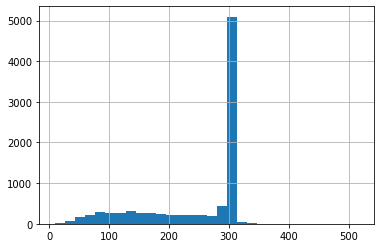

In [93]:
from pythainlp.tokenize import word_tokenize

datasets = datasets.map(lambda x: {'context_newmm':len(word_tokenize(x['context']))})
train_df = pd.DataFrame(datasets['train'])
train_df.context_newmm.hist(bins=30)

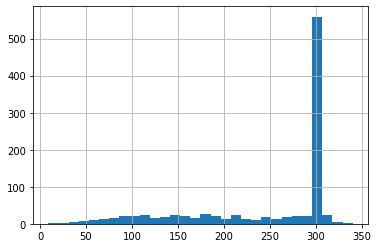

In [94]:
valid_df = pd.DataFrame(datasets['validation'])
valid_df.context_newmm.hist(bins=30)

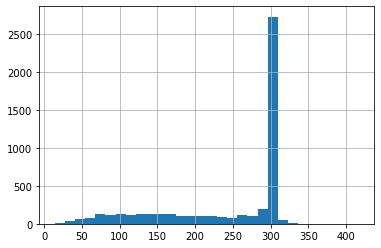

In [95]:
test_df = pd.DataFrame(datasets['test'])
test_df.context_newmm.hist(bins=30)

### Does NSC has overlaps with `thaiqa_squad`?

Not likely.

In [96]:
x = load_dataset('thaiqa_squad')
x

W0712 22:19:23.598779 139784080262976 builder.py:512] Reusing dataset thaiqa_squad (/home/cstorm125/.cache/huggingface/datasets/thaiqa_squad/thaiqa_squad/1.0.0/7b7e2b91d89dc82fb5f3daebad1f7760eff94f7df63eaee9c8de1dd700c090b9)


DatasetDict({
    train: Dataset({
        features: ['question_id', 'article_id', 'context', 'question', 'answers'],
        num_rows: 4000
    })
    validation: Dataset({
        features: ['question_id', 'article_id', 'context', 'question', 'answers'],
        num_rows: 74
    })
})

In [97]:
datasets['train'][50]['context']

'วังเป็นลุ่มน้ำสำคัญลุ่มน้ำหนึ่งทางภาคเหนือของประเทศไทย พื้นที่ลุ่มน้ำประมาณ 10,791 ตารางกิโลเมตร มีต้นกำเนิดแม่น้ำบริเวณเทือกเขาทางตอนเหนือของจังหวัดลำปาง (อำเภอวังเหนือ) แล้วไหลลงสู่ทางใต้โดยบรรจบกับแม่น้ำปิง บริเวณทางเหนือของอำเภอบ้านตาก จังหวัดตาก กลายเป็นแม่น้ำปิง ไหลลงสู่แม่น้ำเจ้าพระยาต่อไปการแบ่งเขตการปกครองการปกครองส่วนภูมิภาค การแบ่งเขตการปกครอง. การปกครองส่วนภูมิภาค. อำเภอวังเหนือแบ่งพื้นที่การปกครองออกเป็น 8 ตำบล 80 หมู่บ้าน ได้แก่การปกครองส่วนท้องถิ่น การปกครองส่วนท้องถิ่น. ท้องที่อำเภอวังเหนือประกอบด้วยองค์กรปกครองส่วนท้องถิ่น 9 แห่ง ได้แก่- เทศบาลตำบลบ้านใหม่ ครอบคลุมพื้นที่บางส่วนของตำบลวังเหนือ(เฉพาะนอกเขตเทศบาลตำบลวังเหนือ) - เทศบาลตำบลวังเหนือ ครอบคลุมพื้นที่บางส่วนของตำบลวังเหนือ(เฉพาะนอกเขตเทศบาลตำบลบ้านใหม่) - องค์การบริหารส่วนตำบลทุ่งฮั้ว ครอบคลุมพื้นที่ตำบลทุ่งฮั้วทั้งตำบล - องค์การบริหารส่วนตำบลวังใต้ ครอบคลุมพื้นที่ตำบลวังใต้ทั้งตำบล - องค์การบริหารส่วนตำบลร่องเคาะ ครอบคลุมพื้นที่ตำบลร่องเคาะทั้งตำบล - องค์การบริหารส่วนตำบลวังทอง ครอบคลุมพื้นที่ตำบลวังทองทั้งต

In [98]:
x.filter(lambda x: 'อำเภอวังเหนือ' in x['context'])['train']

W0712 22:19:23.732116 139784080262976 arrow_dataset.py:1518] Loading cached processed dataset at /home/cstorm125/.cache/huggingface/datasets/thaiqa_squad/thaiqa_squad/1.0.0/7b7e2b91d89dc82fb5f3daebad1f7760eff94f7df63eaee9c8de1dd700c090b9/cache-49f7ea77e69eaa27.arrow
W0712 22:19:23.752578 139784080262976 arrow_dataset.py:1518] Loading cached processed dataset at /home/cstorm125/.cache/huggingface/datasets/thaiqa_squad/thaiqa_squad/1.0.0/7b7e2b91d89dc82fb5f3daebad1f7760eff94f7df63eaee9c8de1dd700c090b9/cache-2c3534c8709efe05.arrow


Dataset({
    features: ['question_id', 'article_id', 'context', 'question', 'answers'],
    num_rows: 2
})

In [99]:
x.filter(lambda x: 'อำเภอวังเหนือ' in x['context'])['train'][0]

W0712 22:19:23.806377 139784080262976 arrow_dataset.py:1518] Loading cached processed dataset at /home/cstorm125/.cache/huggingface/datasets/thaiqa_squad/thaiqa_squad/1.0.0/7b7e2b91d89dc82fb5f3daebad1f7760eff94f7df63eaee9c8de1dd700c090b9/cache-49f7ea77e69eaa27.arrow
W0712 22:19:23.821449 139784080262976 arrow_dataset.py:1518] Loading cached processed dataset at /home/cstorm125/.cache/huggingface/datasets/thaiqa_squad/thaiqa_squad/1.0.0/7b7e2b91d89dc82fb5f3daebad1f7760eff94f7df63eaee9c8de1dd700c090b9/cache-2c3534c8709efe05.arrow


{'answers': {'answer': ['อุทยานแห่งชาติดอยหลวง'],
  'answer_begin_position': [139],
  'answer_end_position': [160]},
 'article_id': 722741,
 'context': '<doc id="722741" url="https://th.wikipedia.org/wiki?curid=722741" title="น้ำตกวังแก้ว">น้ำตกวังแก้ว น้ำตกวังแก้ว เป็นแหล่งท่องเที่ยวหนึ่งในอุทยานแห่งชาติดอยหลวงซึ่งได้รับการประกาศให้เป็นอุทยานแห่งชาติ เมื่อวันที่16 เมษายน พ.ศ. 2533 ครอบคลุมพื้นที่บางส่วนของจังหวัดพะเยา จังหวัดเชียงรายและจังหวัดลำปาง รวมเนื้อที่ประมาณ 731,250 ไร่ สภาพภูมิประเทศเป็นเขาสูงทอดตัวแนวเหนือ-ใต้ มีดอยหลวงเป็นยอดเขาที่สูงที่สุด ประกอบด้วยป่าเบญจพรรณ ป่าดิบชื้นและป่าเต็งรังปะปนกัน มีสัตว์ป่าและน กหลายชนิด ที่ทำการอุทยานฯ ตั้งอยู่ที่บริเวณน้ำตกวังแก้ว น้ำตกวังแก้ว เป็น น้ำตกที่สวยงามที่สุดของจังหวัดลำปาง เกิดจากการทับถมของหินปูนที่ปนมากับน้ำ มีชั้นน้ำตกประมาณ 110 ชั้น แต่เป็นชั้น ใหญ่ 7-8 ชั้น น้ำตกไหลอยู่ตลอดปี เมื่อขึ้นไปถึงชั้นบนสุดของน้ำตกจะพบ หมู่บ้านชาวเขาเผ่าเย้า ที่บ้านป่าคาหลวงและบ้านส้าน ซึ่งมีทางขึ้นค่อนข้างชัน ที่ น้ำตกวังแก้ว ยังมีเส้นทางเดินศึกษา ธร

In [100]:
x.filter(lambda x: 'อำเภอวังเหนือ' in x['context'])['train'][1]

W0712 22:19:23.845624 139784080262976 arrow_dataset.py:1518] Loading cached processed dataset at /home/cstorm125/.cache/huggingface/datasets/thaiqa_squad/thaiqa_squad/1.0.0/7b7e2b91d89dc82fb5f3daebad1f7760eff94f7df63eaee9c8de1dd700c090b9/cache-49f7ea77e69eaa27.arrow
W0712 22:19:23.855583 139784080262976 arrow_dataset.py:1518] Loading cached processed dataset at /home/cstorm125/.cache/huggingface/datasets/thaiqa_squad/thaiqa_squad/1.0.0/7b7e2b91d89dc82fb5f3daebad1f7760eff94f7df63eaee9c8de1dd700c090b9/cache-2c3534c8709efe05.arrow


{'answers': {'answer': ['110'],
  'answer_begin_position': [640],
  'answer_end_position': [643]},
 'article_id': 722741,
 'context': '<doc id="722741" url="https://th.wikipedia.org/wiki?curid=722741" title="น้ำตกวังแก้ว">น้ำตกวังแก้ว น้ำตกวังแก้ว เป็นแหล่งท่องเที่ยวหนึ่งในอุทยานแห่งชาติดอยหลวงซึ่งได้รับการประกาศให้เป็นอุทยานแห่งชาติ เมื่อวันที่16 เมษายน พ.ศ. 2533 ครอบคลุมพื้นที่บางส่วนของจังหวัดพะเยา จังหวัดเชียงรายและจังหวัดลำปาง รวมเนื้อที่ประมาณ 731,250 ไร่ สภาพภูมิประเทศเป็นเขาสูงทอดตัวแนวเหนือ-ใต้ มีดอยหลวงเป็นยอดเขาที่สูงที่สุด ประกอบด้วยป่าเบญจพรรณ ป่าดิบชื้นและป่าเต็งรังปะปนกัน มีสัตว์ป่าและน กหลายชนิด ที่ทำการอุทยานฯ ตั้งอยู่ที่บริเวณน้ำตกวังแก้ว น้ำตกวังแก้ว เป็น น้ำตกที่สวยงามที่สุดของจังหวัดลำปาง เกิดจากการทับถมของหินปูนที่ปนมากับน้ำ มีชั้นน้ำตกประมาณ 110 ชั้น แต่เป็นชั้น ใหญ่ 7-8 ชั้น น้ำตกไหลอยู่ตลอดปี เมื่อขึ้นไปถึงชั้นบนสุดของน้ำตกจะพบ หมู่บ้านชาวเขาเผ่าเย้า ที่บ้านป่าคาหลวงและบ้านส้าน ซึ่งมีทางขึ้นค่อนข้างชัน ที่ น้ำตกวังแก้ว ยังมีเส้นทางเดินศึกษา ธรรมชาติระยะสั้น 1.4

## `thaiqa_squad` Context Length

`thaiqa_squad` also has the long-passage issues so we applied the same technique to truncate the contexts to around 300 `newmm` words.

W0712 22:21:25.049294 139784080262976 builder.py:512] Reusing dataset thaiqa_squad (/home/cstorm125/.cache/huggingface/datasets/thaiqa_squad/thaiqa_squad/1.0.0/7b7e2b91d89dc82fb5f3daebad1f7760eff94f7df63eaee9c8de1dd700c090b9)


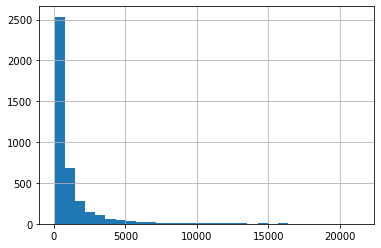

In [101]:
from pythainlp.tokenize import word_tokenize

datasets = load_dataset('thaiqa_squad')
datasets = datasets.map(lambda x: {'context_newmm':len(word_tokenize(x['context']))})
train_df = pd.DataFrame(datasets['train'])
train_df.context_newmm.hist(bins=30)

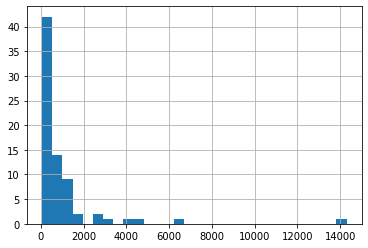

In [102]:
valid_df = pd.DataFrame(datasets['validation'])
valid_df.context_newmm.hist(bins=30)

In [104]:
# #convert to jsonl format
# with open('../data/thwiki_qa.n-4000.newmm-300.rm_left_padding.right-margin-ntokens-10.json') as f:
#     j = json.load(f)

# with open('../data/thwiki_qa.n-4000.newmm-300.rm_left_padding.right-margin-ntokens-10.jsonl', 'a') as f:
#     for i in j:
#         json.dump(i,f)
#         f.write('\n')

In [105]:
datasets = load_dataset('json', 
                       data_files={'train':'../data/thwiki_qa.n-4000.newmm-300.rm_left_padding.right-margin-ntokens-10.jsonl',
                                  },)
datasets

W0712 22:27:04.353380 139784080262976 builder.py:357] Using custom data configuration default-5e2cb1e988d7371b


Dataset json downloaded and prepared to /home/cstorm125/.cache/huggingface/datasets/json/default-5e2cb1e988d7371b/0.0.0/dc7ee63ec8b554c48ecc5a8a6fbe27af8071408c244e4347cf9222d6206d83a2. Subsequent calls will reuse this data.


DatasetDict({
    train: Dataset({
        features: ['dataset', 'question', 'question_id', 'doc_id', 'answers', 'passage', 'passage_ntokens_newmm', 'title'],
        num_rows: 4000
    })
})

In [106]:
datasets = datasets.map(convert_nscqa_to_iapp, remove_columns=['dataset',
                                                               'doc_id',
                                                               'passage',
                                                               'passage_ntokens_newmm',])
datasets

DatasetDict({
    train: Dataset({
        features: ['answers', 'article_id', 'context', 'question', 'question_id', 'title'],
        num_rows: 4000
    })
})

In [107]:
i = 301
example = datasets['train'][i]
example

{'answers': {'answer_end': [785],
  'answer_start': [773],
  'text': ['สาขาชีววิทยา']},
 'article_id': '150251',
 'context': 'แกรี่ เลวิน แกรี่ เลวิน เป็นหัวหน้าทีมกายภาพบำบัดของสโมสรฟุตบอลอาร์เซนอลและเป็นนักกายภาพบำบัดของทีมชาติอังกฤษอีกด้วยประวัติ ประวัติ. แกรี่ เลวิน เกิดเมื่อวันที่ 16 พฤษภาคม ค.ศ. 1964 ที่อีสต์แฮม(East Ham) กรุงลอนดอน ได้มาอยู่กับอาร์เซนอลด้วยการเป็นผู้รักษาประตูทีมเยาวชนตั้งแต่อายุแค่ 16 ปี และผัดตัวเองมาเป็นนักกายภาพบำบัดของทีมสำรองด้วยอายุที่น้อยมากเพียง 19 ปีเท่านั้น หลังจากนั้นหนึ่งปี ก็ไปเป็นนักเตะของสโมสรฟุตบอลบาร์เน็ต ต่อมาในปี 1986 แกรี่ มีอายุเพียง 22 ปี แต่ก็ได้ทำงานเต็มเวลาในตำแหน่งนักกายภาพบำบัดของทีมชุดใหญ่ในที่สุด เขามีประสบการณ์ด้านงานนี้มาแล้วว่า 1,000 เกม (ครบเกมที่ 1,000 เมื่อธันวาคม ปี 2004) ส่วนการได้รับอนุญาตให้เป็นนักกายภาพบำบัดนั้น เนื่องจากว่าเขาเรียนมาจากโรงพยาบาลกาย วิทยาลัยแห่งวิชากายภาพบำบัดในช่วงปี 1983 ถึง 1986 เขาจบปริญญาตรี (hons) ในสาขาชีววิทยาและอนุปริญญาสาขากายภาพบำบัด เขาเป็นสามาชิกของวิทยาลัยแห่งกายภาพบำบัดการกีฬา และเป็นสมาชิก

In [108]:
example['context'][example['answers']['answer_start'][0]:example['answers']['answer_end'][0]], example['answers']['text']

('สาขาชีววิทยา', ['สาขาชีววิทยา'])

In [109]:
datasets.save_to_disk("thaiqa_w300")
datasets = load_from_disk('thaiqa_w300')
datasets

DatasetDict({
    train: Dataset({
        features: ['answers', 'article_id', 'context', 'question', 'question_id', 'title'],
        num_rows: 4000
    })
})

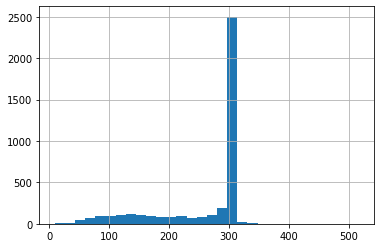

In [110]:
from pythainlp.tokenize import word_tokenize

datasets = datasets.map(lambda x: {'context_newmm':len(word_tokenize(x['context']))})
train_df = pd.DataFrame(datasets['train'])
train_df.context_newmm.hist(bins=30)

## `iapp_wiki_qa_squad` Context Length

`iapp_wiki_qa_squad` also has some very long-passage issues but not as severe as the original `nsc_qa`, so we decided to NOT preprocess it.

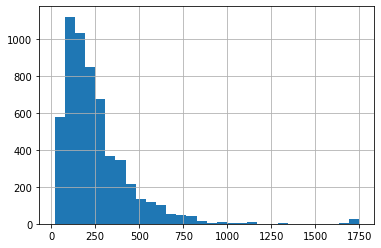

In [26]:
from pythainlp.tokenize import word_tokenize

datasets = load_dataset('iapp_wiki_qa_squad')
datasets = datasets.map(lambda x: {'context_newmm':len(word_tokenize(x['context']))})
train_df = pd.DataFrame(datasets['train'])
train_df.context_newmm.hist(bins=30)

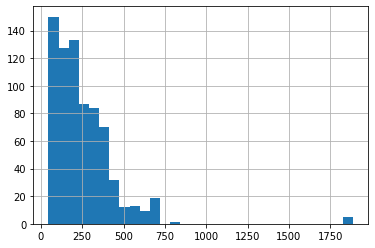

In [27]:
valid_df = pd.DataFrame(datasets['validation'])
valid_df.context_newmm.hist(bins=30)

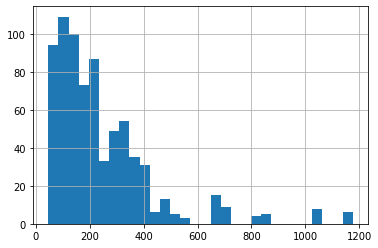

In [28]:
test_df = pd.DataFrame(datasets['test'])
test_df.context_newmm.hist(bins=30)